<h1 align="center">Volume 4: River Crossing.</h1>

    Samuel Goldrup
    002
    23 February 2023

In [1]:
import numpy as np
import scipy.integrate as integrate
from autograd import grad
from scipy import optimize
import matplotlib 
matplotlib.use('nbAgg') #perfect
from matplotlib import pyplot as plt
from scipy.interpolate import barycentric_interpolate

# Problem 1
Assume that the current is given by $c(x) = −
\frac{7}{10} (x^2 − 1)$. (This function assumes, for example, that the current is faster near the center of the river.) Write a Python
function that accepts as arguments a function $y$, its derivative $y'$, and an $x$-value, and returns $L(x, y(x), y'(x))$ (where $T[y]=\int^1_{-1} L(x,y(x),y'(x))dx$ Use that function to defune a second
function that numerically computes $T[y]$ for a given path $y(x)$.

In [2]:
c = lambda x: -0.7*(x**2 - 1)

def L(y,yp):
    """
    paramters
    ---------
    x: float
    point in x space
    y: callable
    function expressing position in y space
    yp: callable
    derivative of y
    
    returns:
    L: callable
    the integrand to the cost functional
    """
    
    alpha = lambda x: (1-c(x)**2)**(-0.5) #integrand of cost functional
    L = lambda x: alpha(x)*np.sqrt(1+(alpha(x)*yp(x))**2) - (alpha(x)**2 * c(x) * yp(x))
    return L

def cost(L):
    """
    parameters
    ----------
    L: callable
    the integrand to the cost functional
    
    returns:
    cost: float
    total cost of the path y(x)
    """
    
    cost = integrate.quad(L,-1,1) #integral calculation
    return cost

# Problem 2

Let y(x) be the straight-line path between A = (−1, 0) and B = (1, 5). Numerically calculate T[y] to get an upper bound on the minimum time required to cross from A to
B. Using (18.2), find a lower bound on the minimum time required to cross.

In [3]:
A, B = (-1,0), (1,5)
y = lambda x: (5/2)*(x+1)
yp = lambda x: ((B[1]-A[1])/(B[0]-A[0]))
ub = cost(L(y,yp))[0] #upper bound in minimum time

#we know perpendicular vectors are independent
#so opt_thet = 0, sec(0)=1
sec_thet = 1

integrand = lambda x: sec_thet

min_time = integrate.quad(integrand,-1,1)[0]

ub, min_time

(3.8770820491384126, 2.0)

# Problem 3

Numerically solve the Euler-Lagrange equation (18.4), using c(x) = −
7
10 (x
2 − 1)
and α = (1 − c
2
)
−1/2
, and y(−1) = 0, y(1) = 5.
Hint: Since this boundary value problem is defined over the doimain [−1, 1], it is easy to
solve using the pseudospectral method. Begin by replacing each d
dx with the pseudospectral
differentiation matrix D. Then impose the boundary conditions and solve.

In [4]:
def cheb(N):
    x = np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    
    dX = X - X.T
    
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D, x

<IPython.core.display.Javascript object>


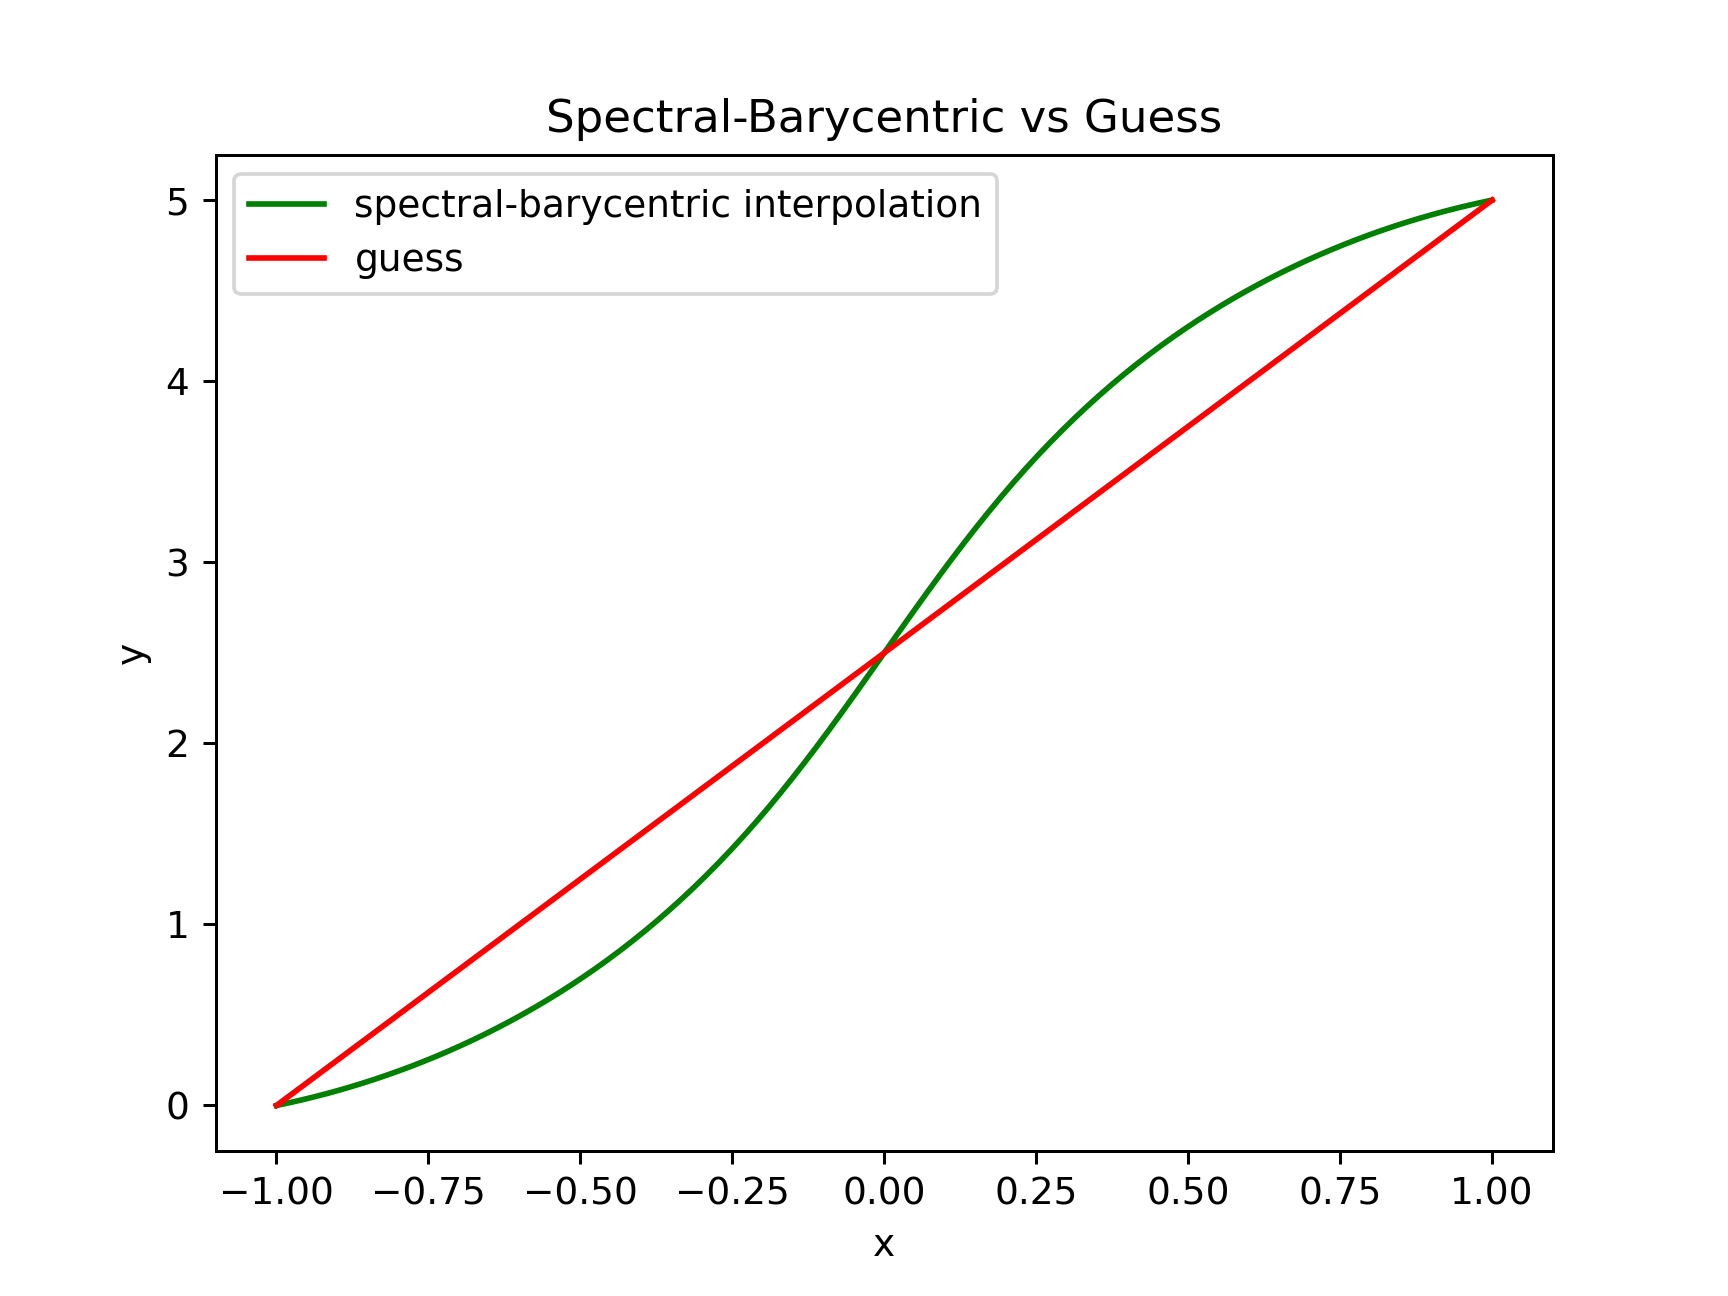

In [5]:
c = lambda x: (-7/10)*((x**2)-1)
alph = lambda x: (1-c(x)**2)**(-1/2)
y = lambda x: (5/2)*(x+1)

def F(U):
    f = D@((alph(x)**3)*(D@U)*
          ((1+(alph(x)**2)*((D@U)**2))**(-1/2)) #optimize over position
          -((alph(x)**2)*(c(x))))
    f[0] = U[0] - 5 #impose boundary conditions
    f[-1] = U[-1]
    return f

N = 50
D,x= cheb(N)
guess = y(x)
soln = optimize.root(F,guess).x #rootfind to optimizer
x_vals = np.linspace(x[0],x[-1],100)
bary_pts = barycentric_interpolate(x,soln,x_vals)

plt.plot(x_vals,bary_pts,label="spectral-barycentric interpolation",color="green")
plt.plot(x,guess,label="guess",color="red")
plt.title("Spectral-Barycentric vs Guess")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Problem 4

Plot the angle at which the boat should be pointed at each $x$-coordinate. (Hint: use Equation 1.1; see Figure 1.3. Note that the angle the boat should be steered is NOT described by the tangent vector to the trjaectory)

<IPython.core.display.Javascript object>


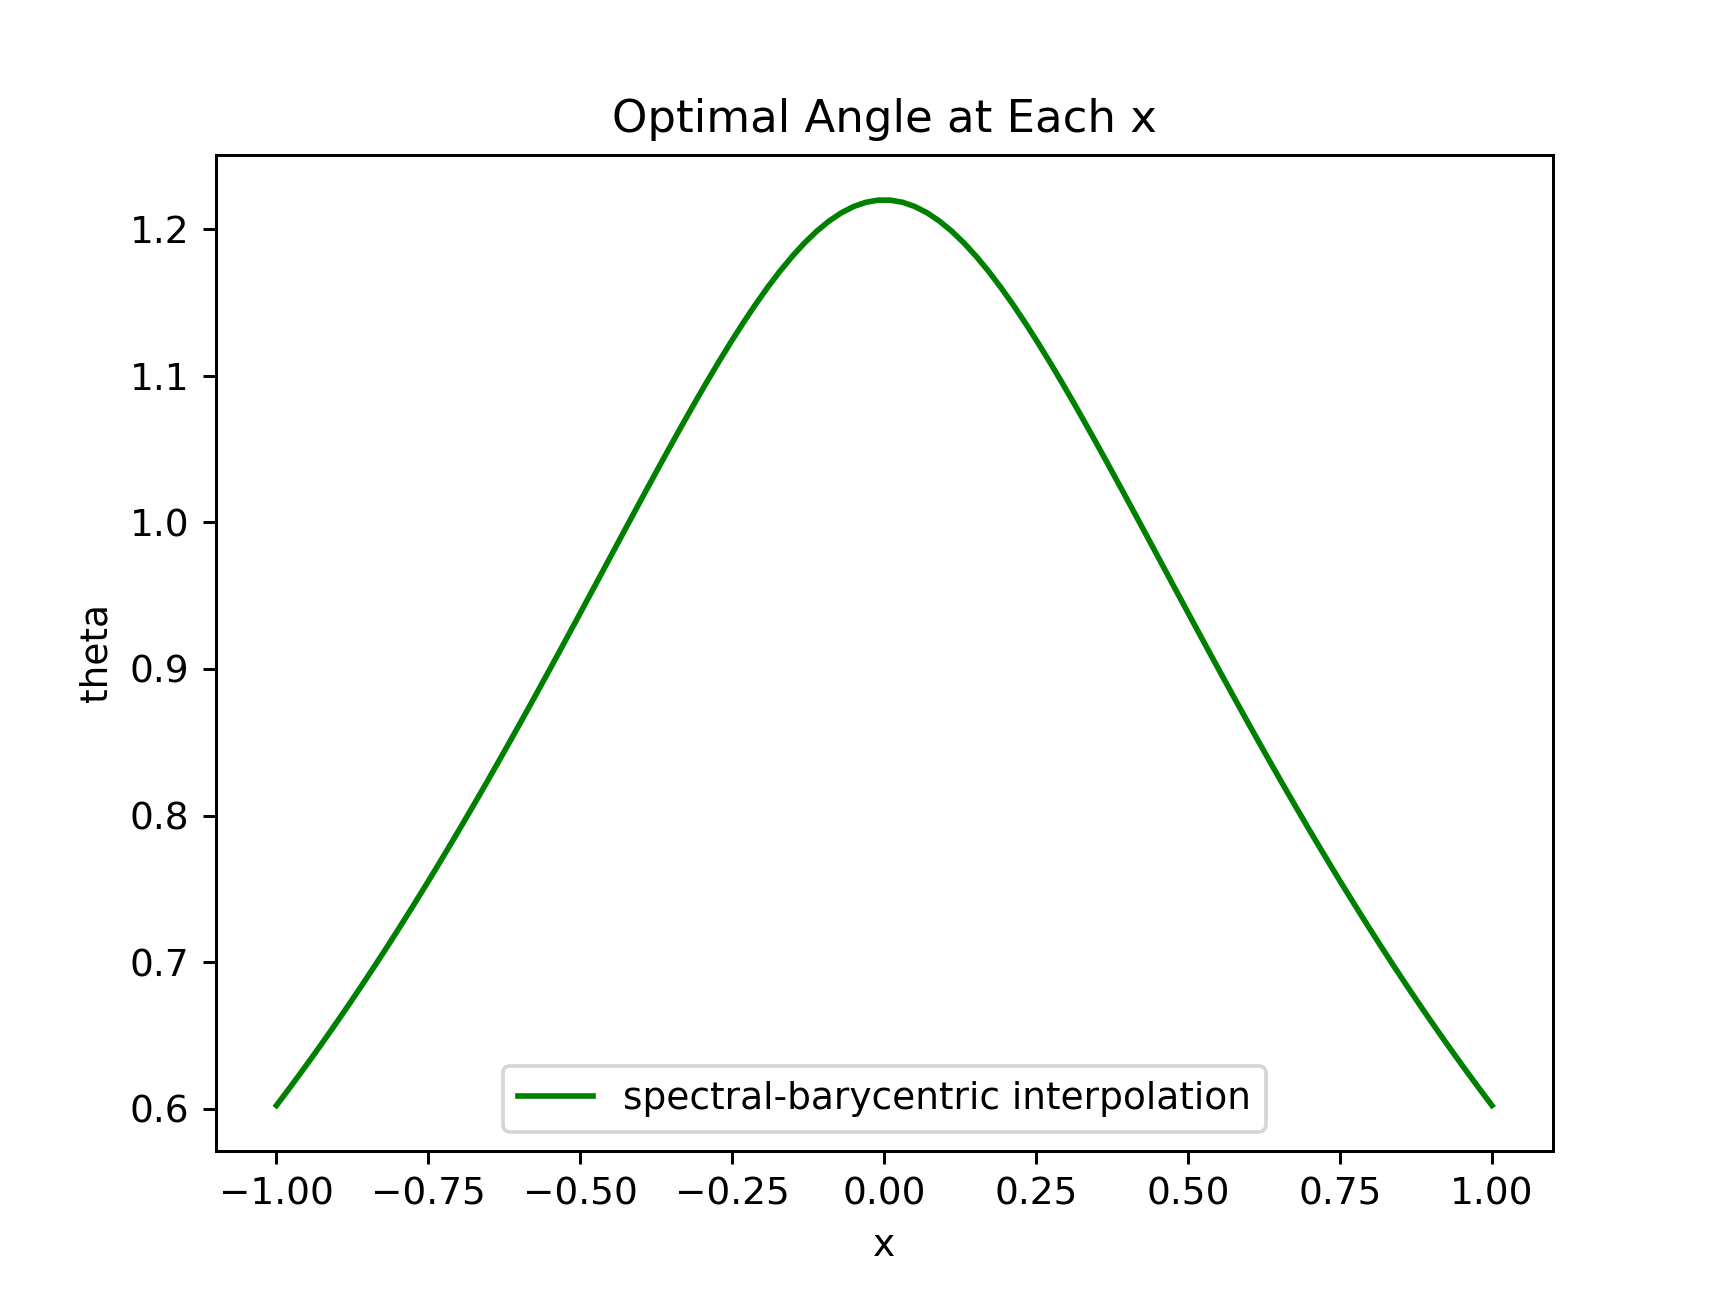

In [6]:
def F(U):
    f = D@soln - c(x)*(1/np.cos(U)) - np.tan(U) #optimize over angle
    return f

N = 50
D,x= cheb(N)
guess = np.zeros(len(x))
soln = optimize.root(F,guess).x #rootfind to optimizer
x_vals = np.linspace(x[0],x[-1],100)
bary_pts = barycentric_interpolate(x,soln,x_vals)

plt.plot(x_vals,bary_pts,label="spectral-barycentric interpolation",color="green")
plt.title("Optimal Angle at Each x")
plt.legend()
plt.xlabel('x')
plt.ylabel('theta')
plt.show()